In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Reading and displaying the dataset
df = pd.read_csv('Bike1.csv')
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,1,4,2,4,3,0
1,2,27,0,3,1,1,1,1
2,3,39,0,2,2,4,4,0
3,4,20,0,2,3,1,4,0
4,5,29,1,1,2,4,3,1


In [3]:
#Dropping irrelevant variable
df = df.drop('ID', axis=1)

In [4]:
df.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,53,1,4,2,4,3,0
1,27,0,3,1,1,1,1
2,39,0,2,2,4,4,0
3,20,0,2,3,1,4,0
4,29,1,1,2,4,3,1


In [5]:
#Training set
x = df.drop('Response',axis=1)
x.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship
0,53,1,4,2,4,3
1,27,0,3,1,1,1
2,39,0,2,2,4,4
3,20,0,2,3,1,4
4,29,1,1,2,4,3


In [6]:
#Testing set
y = df[['Response']]
y.head()

,Response
0,0
1,1
2,0
3,0
4,1


## Trying with feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler     #USing Z- score Normalization. It will convert features mean=0 & SD = 1

In [8]:
sc = StandardScaler()

In [64]:
x_scaled = sc.fit_transform

array([[ 1.52923558,  1.07814339,  1.65626309, -0.3964128 ,  0.74998446,
         0.58038285],
       [-0.43240866, -0.92752041,  0.78959388, -1.61701042, -1.55151772,
        -1.18519063],
       [ 0.47296561, -0.92752041, -0.07707532, -0.3964128 ,  0.74998446,
         1.4631696 ],
       ...,
       [-0.65875222, -0.92752041, -0.94374453,  0.82418482,  0.74998446,
         1.4631696 ],
       [-0.73420008, -0.92752041, -0.94374453,  0.82418482, -0.01718293,
        -1.18519063],
       [-1.11143936,  1.07814339, -0.94374453,  0.82418482,  0.74998446,
        -1.18519063]])

In [10]:
#Looking for important features
from sklearn.decomposition import PCA

In [11]:
pc = PCA()

In [65]:
pcom = pc.fit_transform(x_scaled)

array([[ 2.05263942e+00, -7.40369721e-04,  1.29277764e+00,
         6.87980553e-01, -9.45608105e-01, -2.20297531e-01],
       [ 1.03883533e+00,  8.31140470e-01, -9.67325533e-01,
        -1.69978390e+00,  1.47953272e+00, -5.59787667e-01],
       [ 4.80102253e-01,  2.80407049e-01, -6.95156216e-01,
         1.74687503e+00,  5.62136230e-02,  3.21427212e-01],
       ...,
       [-1.25507458e+00, -3.14683808e-01, -9.33801202e-01,
         1.73235522e+00, -1.26913116e-01,  6.43476543e-02],
       [-1.70618106e+00,  7.51081037e-01, -5.77133243e-01,
        -7.45134762e-01, -6.89773866e-02,  7.75070418e-02],
       [-1.90983160e+00, -1.38630914e-01,  1.38777678e+00,
        -5.79956315e-01,  4.36256635e-02, -6.26603797e-02]])

In [13]:
#All features are important cannot drop any ..
pc.explained_variance_ratio_

array([0.32923189, 0.18690591, 0.15405866, 0.14355314, 0.10797575,
       0.07827464])

In [14]:
#converting array into df
xpca = pd.DataFrame(data=pcom,columns=['Age','Gender','Occupation','Phone Type','Current Bike', 'Reletionship'])
xpca.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Reletionship
0,2.052639,-0.000740,1.292778,0.687981,-0.945608,-0.220298
1,1.038835,0.831140,-0.967326,-1.699784,1.479533,-0.559788
2,0.480102,0.280407,-0.695156,1.746875,0.056214,0.321427
3,-0.385017,-1.379399,-2.103656,0.225488,0.039957,-0.698169
4,-0.450811,-0.688229,1.032595,0.796791,0.623894,0.649229


In [15]:
xpca.corr()

,Age,Gender,Occupation,Phone Type,Current Bike,Reletionship
Age,1.000000e+00,-5.928599e-17,1.794766e-16,-2.467076e-17,3.216372e-18,-5.223183e-17
Gender,-5.928599e-17,1.000000e+00,-3.545927e-16,4.092908e-17,1.660260e-17,1.282619e-16
Occupation,1.794766e-16,-3.545927e-16,1.000000e+00,-8.360610e-17,8.309263e-17,4.703740e-18
Phone Type,-2.467076e-17,4.092908e-17,-8.360610e-17,1.000000e+00,1.810072e-17,5.761854e-17
Current Bike,3.216372e-18,1.660260e-17,8.309263e-17,1.810072e-17,1.000000e+00,-1.440470e-16
Reletionship,-5.223183e-17,1.282619e-16,4.703740e-18,5.761854e-17,-1.440470e-16,1.000000e+00


In [16]:
#Train test split for training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xpca,y,test_size=0.3, random_state=50)

In [17]:
xtrain.shape

(1062, 6)

In [18]:
ytrain.shape

(1062, 1)

In [19]:
xtest.shape

(456, 6)

In [20]:
ytest.shape

(456, 1)

In [21]:
#initialize logistic model in object
lr = LogisticRegression()

In [22]:
#Fitting training data
lr.fit(xtrain,ytrain)

C:\Users\GOD\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [23]:
# checking coefficient values
lr.coef_

array([[-1.19699578, -0.28154191,  0.32664654, -0.05085811,  0.40529559,
        -0.19276342]])

Logistic Reg Accuracy for training and testing data.

In [24]:
#predicting on test data
pred = lr.predict(xtest)

In [25]:
#Testing accuracy
accuracy_score(ytest,pred)

0.7741228070175439

In [26]:
#predicting on training data
pred1 = lr.predict(xtrain)

In [27]:
#Training accuracy
accuracy_score(ytrain,pred1)

0.7570621468926554

In [28]:
# Best-fit model bcz whatever the data it trained it gives good accuracy on testing data also.

In [29]:
confusion_matrix(ytest,pred)

array([[142,  55],
       [ 48, 211]], dtype=int64)

### Implementing SVM on ktm data


In [30]:
from sklearn.svm import SVC

In [31]:
sv = SVC()

In [32]:
sv.fit(xtrain, ytrain)

C:\Users\GOD\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [33]:
predsv = sv.predict(xtest)

In [34]:
# predsv

SVM Accuracy for training and testing data.

In [35]:
#Testing accuracy
accuracy_score(ytest, predsv)

0.7697368421052632

In [36]:
predsv1 = sv.predict(xtrain)

In [37]:
#Training accuracy
accuracy_score(ytrain, predsv1)

0.8173258003766478

In [38]:
confusion_matrix(predsv, ytest)

array([[153,  61],
       [ 44, 198]], dtype=int64)

## Finding the right k value using cross validation technique.

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [40]:
score = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k)
    w = cross_val_score(knn, x,y, cv=5, scoring='accuracy') #cv is no. of departments. Data points are divided into 5 departments
    score.append(w.mean())

C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

Text(0, 0.5, 'accuracy')

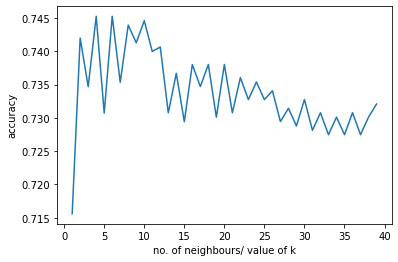

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(1,40), score)
plt.xlabel('no. of neighbours/ value of k' )
plt.ylabel('accuracy')

In [42]:
# score

# Implementing knn using cross validation technique

In [43]:
kn = KNeighborsClassifier(n_neighbors= 10)

In [44]:
kn.fit(xtrain,ytrain)

C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

KNN using CV Accuracy for training and testing data.

In [45]:
kn_pred = kn.predict(xtest)

In [46]:
#Accuracy on test set
accuracy_score(ytest,kn_pred)

0.7675438596491229

In [47]:
kn_pred1 = kn.predict(xtrain)

In [48]:
#Training accuracy
accuracy_score(kn_pred1, ytrain)

0.815442561205273

In [49]:
#Find out the working logic of knn regressor
#find out how elbow curve looks like
#find out the diff bw eucledian distance, manhattan and mainkawski  

# Implementing knn using hyper parameter tuning

In [50]:
#Using grid search
from sklearn.model_selection import GridSearchCV

In [51]:
tuned_knn = KNeighborsClassifier()

In [52]:
k_parameter = {'n_neighbors':[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]}

In [53]:
H_knn = GridSearchCV(tuned_knn, param_grid= k_parameter, verbose=1, n_jobs= -1)

In [54]:
H_knn.fit(x,y)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                         20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                         30, 31, 32, 33, 34, 35, 36, 37, 38, 39, ...]},
             verbose=1)

In [55]:
H_knn.best_score_

0.7446109084592669

In [56]:
H_knn.best_params_

{'n_neighbors': 10}

In [57]:
H_knn.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [58]:
#using random search
from sklearn.model_selection import RandomizedSearchCV

In [59]:
Hr_knn = RandomizedSearchCV(tuned_knn, param_distributions= k_parameter, verbose=1, n_jobs= -1)

In [60]:
Hr_knn.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\GOD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [10, 11, 12, 13, 14, 15,
                                                        16, 17, 18, 19, 20, 21,
                                                        22, 23, 24, 25, 26, 27,
                                                        28, 29, 30, 31, 32, 33,
                                                        34, 35, 36, 37, 38, 39, ...]},
                   verbose=1)

In [61]:
Hr_knn.best_score_

0.7446109084592669

In [62]:
Hr_knn.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [63]:
Hr_knn.best_params_

{'n_neighbors': 10}

## Conclusion:
SVM model is best model among all these models because its giving best accuracy with error rate approx 5% of difference.
The training and testing is 76 and 79 % approx before feature scaling. After scaling training accuracy is 76 and 81 is testing accuracy.